<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap6_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다항 회귀(Polynomial Regression)
### 1. 개념
데이터가 단순한 직선 형태가 아닌 비선형의 형태를 갖고 있을 때, 각 변수의 거듭제곱을 새로운 변수로 추가하면 선형 모델을 사용할 수 있음. 이렇게 확장된 특성을 데이터세트에 선형 모델로 훈련시키는 기법을 다항 회귀(Polynomial Regression)라고 한다. 예를 들어 시리얼의 설탕 함류량(X)에 따른 영양등급평가(y)를 회귀분석으로 예측할 때 설탕 함류량(X)을 제곱하여 새로운 특성으로 추가할 수 있음.
#### (1) 다항변수 생성
scikit-learn의 PolynomialFeatures(degree = d)를 활용해 변수특성을 거듭제곱으로 변환. 이때 주어진 차수까지 변수 간의 모든 교차항을 추가하는데 이때문에 설명변수가 여러 개일 때 다항 회귀는 일반적인 선형회귀 모델과 달리 변수 사이의 관계를 찾을 수 있음. 변수 a와 b가 있을 때 degree=3으로 PolynomialFeatures를 적용하면 a², a³, b², b³뿐만 아니라 ab, a²b, ab²도 변수로 추가됨. 각 변수의 거듭제곱을 추가해 고차 다항 회귀를 적용하면 훈련데이터에 적합한 모델을 생성할 수 있지만 과대적합의 가능성이 있어 주의할 필요가 있음.  


#### (2) 선형결합
PolynomialFeatures로 생성한 변수들은 LinearRegression()의 입력값으로 대립하면 다항 회귀분석을 수행할 수 있음. 매개변수와 메서드, 속성을 그대로 활용할 수 있음.


### 2. scikit-learn의 PoiynomialFeatures
다항 회귀는 다항변수를 생성한 뒤 LinearRegression 함수에 적용하면 됨.  


① 매개변수
 - degree int(default = 2) : 다항식의 차수를 결정.
 - interaction_only bool(default = False) : 교차항을 추가할지 여부를 결정. True인 경우 교차항만 생성. False인 경우 교차항과 함께 동일한 변수의 2제곱 이상인 항도 추가.
 - include_bias bool(default = True) : bias 칼럼을 추가할지 결정. True인 경우 bias 칼럼을 추가하고, False인 경우 추가하지 않음.  


② 메서드
 - fit_transform(X) :  
   - 데이터를 적합시킨 뒤 변환.
   - 매개변수
     - X : 샘플데이터, 2차원 array 형태로 입력
   - 반환값 : 새로운 X 데이터
 - transform(X) :
   - 데이터를 다항 변수로 변환.
   - 매개변수
     - X : 샘플데이터, 2차원 array 형태로 입력
   - 반환값 : 새로운 X 데이터



In [2]:
# 캐글의 80가지 시리얼 영양소 평가데이터를 통한 다항 회귀 모델 구현
import pandas as pd

url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv'
cereal = pd.read_csv(url)
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
# name, mfr, type 변수는 Object이므로 분석에서 제외
# sugars(설탕 함류량)이 0 이상인 데이터만 추출.

cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,sugars,potass,vitamins,shelf,weight,cups,rating
0,6,280,25,3,1.0,0.33,68.402973
1,8,135,0,3,1.0,1.00,33.983679
2,5,320,25,3,1.0,0.33,59.425505
3,0,330,25,3,1.0,0.50,93.704912
4,8,-1,25,3,1.0,0.75,34.384843


<ipython-input-8-76a0e396b949>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace = True)


<function matplotlib.pyplot.show(close=None, block=None)>

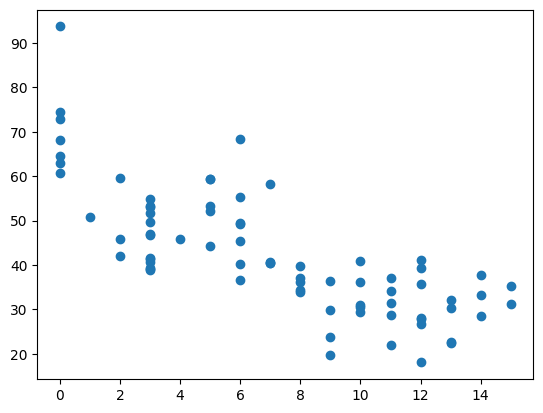

In [8]:
# sugars 변수와 rating 변수 사이의 관계를 확인
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars','rating']]
cereal2.sort_values(by=['sugars'], inplace = True)
cereal2.reset_index(drop = True, inplace = True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show

In [9]:
# 아래로 볼록한 형태의 산점도가 그려짐

In [11]:
# 독립변수 X = sugars
# 종속변수 y = rating
# 데이터 분할 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)
